В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [435]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [457]:
medical_df = pd.read_csv('medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

### 1. Метод МНК

In [460]:
X = np.expand_dims(non_smoker_df.age, axis=1)

In [462]:
y = non_smoker_df.charges

In [463]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [465]:
# Додаємо колонку одиничок 
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
X[:3], X_with_intercept[:3]

(array([[18],
        [28],
        [33]], dtype=int64),
 array([[ 1., 18.],
        [ 1., 28.],
        [ 1., 33.]]))

In [468]:
MNK_coefs = normal_equations(X_with_intercept, y)

In [470]:
# Коефiцiєнти моделі
MNK_coefs

array([-2091.42055657,   267.24891283])

In [472]:
# Прогнози моделi
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)

In [474]:
# Точнiсть прогнозу RMSE
rmse = root_mean_squared_error(y, predictions_MNK)
print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: 4662.51


### 2. Градієнтний спуск

In [476]:
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

In [478]:
# lr = 0.1
m, b, errors = full_batch_gradient_descent(X, y, lr=0.1, epochs=100)

In [480]:
for value in errors[:10]:
    print(value)

113878364137.68315
1.099183932063832e+16
1.3391942332152962e+21
1.6316150540575953e+26
1.9878876556111374e+31
2.42195444415877e+36
2.9508022312141537e+41
3.5951269970161446e+46
4.380143809012967e+51
5.33657359074052e+56


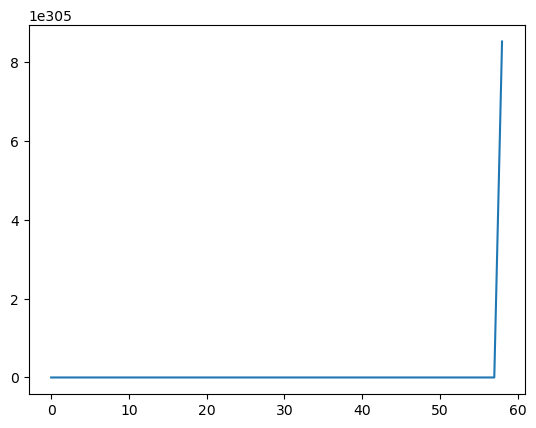

In [482]:
plt.plot(errors);

In [484]:
m, b

(-4.277831608428086e+256, -9.63178894604231e+254)

Learning rate = 0.1 призвiв до розбiжностi алгоритму, пiсля кожної епохи сума квадратiв помилок збiльшується, що видно з графiку та фактичних значень. Коефiцiєнти регресiї при цьому мають величезнi вiд'ємнi значення.

Аналогiчна ситуацiя для значень 0.01, 0.001.

In [491]:
# lr = 0.0001
m, b, errors = full_batch_gradient_descent(X, y, lr=0.0001, epochs=100)

In [493]:
for value in errors[:20]:
    print(value)

113878364137.68315
61771382439.929565
39759524299.745636
30460917858.43906
26532841578.29735
24873468451.34927
24172476311.901295
23876338424.421257
23751225388.040592
23698359338.564545
23676012989.267677
23666559248.577774
23662551805.419285
23660845072.875237
23660110243.036304
23659785980.13066
23659635155.942432
23659557599.0705
23659510993.54849
23659477463.605556


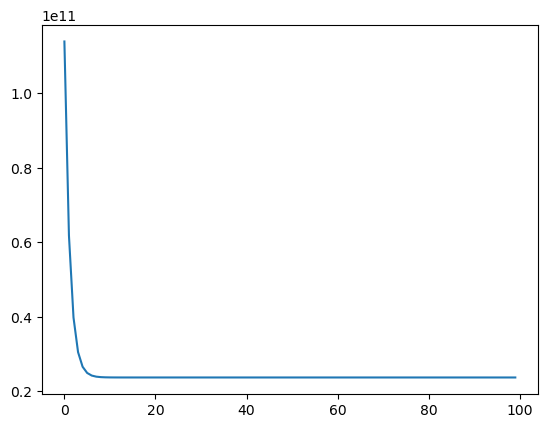

In [495]:
plt.plot(errors);

In [497]:
# Коефiцiєнти моделі
m, b

(220.15455659787733, 0.2129582687167215)

In [499]:
# прогнози моделi
predictions_fbgd = m * X[:, 0] + b

При learning rate = 0.0001 алгоритм збiгається досить швидко, тому з протестованих значень параметра цей є найкращим.

Якщо learning rate зменшити до 0.00001, алгоритм буде довго збiгатися:

In [501]:
# lr = 0.00001
m_low, b_low, errors = full_batch_gradient_descent(X, y, lr=0.00001, epochs=100)

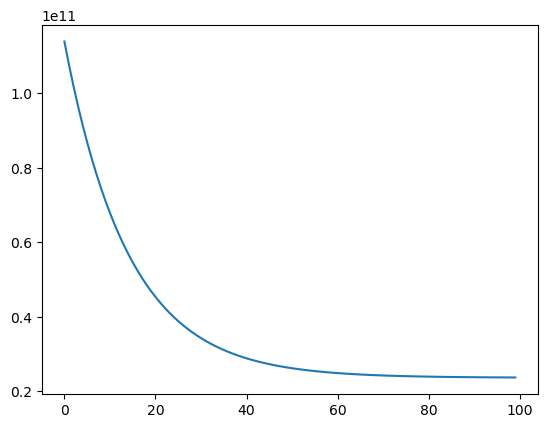

In [503]:
plt.plot(errors);

### 3. scikit-learn.LinearRegression

In [505]:
lin_reg = LinearRegression()

In [507]:
lin_reg.fit(X, y)

LinearRegression()

In [509]:
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), -2091.420556565079)

In [511]:
predictions_sklearn = lin_reg.predict(X)

In [513]:
predictions_sklearn

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

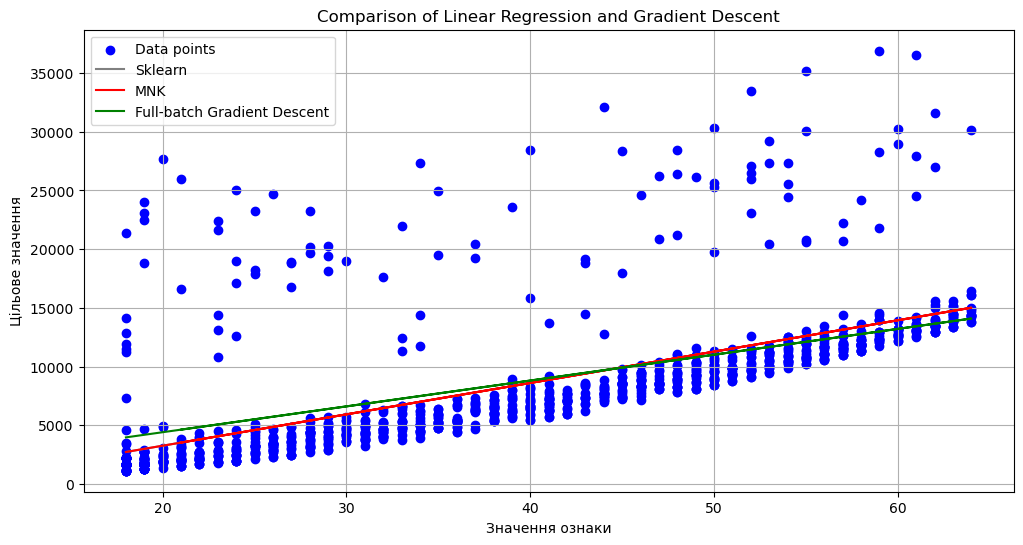

In [515]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_sklearn, color='grey', label='Sklearn')
plt.plot(X[:, 0], predictions_MNK, color='red', label='MNK')
plt.plot(X[:, 0], predictions_fbgd, color='green', label='Full-batch Gradient Descent')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [526]:
print('Коефіцієнти з МНК: ', MNK_coefs)
print('Коефіцієнти з град. спуску: ', b, m)
print('Коефіцієнти з sklearn: ', lin_reg.intercept_, lin_reg.coef_)

Коефіцієнти з МНК:  [-2091.42055657   267.24891283]
Коефіцієнти з град. спуску:  0.2129582687167215 220.15455659787733
Коефіцієнти з sklearn:  -2091.420556565079 [267.24891283]


Порiвняння моделей на метриках:

In [523]:
print('RMSE МНК: ', rmse)

rmse_fbgd = root_mean_squared_error(y, predictions_fbgd)
print('RMSE град. спуску: ', rmse_fbgd)

rmse_sklearn = root_mean_squared_error(y, predictions_sklearn)
print('RMSE sklearn: ', rmse_sklearn)

RMSE МНК:  4662.505766636395
RMSE град. спуску:  4715.349747703003
RMSE sklearn:  4662.505766636395


Моделi sklearn та МНК iдентичнi, наближена модель градiєнтного спуску менш точна та вiдрiзняється вiд двух iнших: 
має бiльший RMSE та iншi коефiцiєнти.

Мої найкращi параметри були (-2790, 285), b вiдрiзняться, а m досить схожий.
Оцiнки RMSE майже однаковi: 4662.5 та 4669.2. 

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [573]:
smoker_df = medical_df[medical_df.smoker == 'yes']
X = np.expand_dims(smoker_df.age, axis=1)
y = smoker_df.charges

In [575]:
lin_reg = LinearRegression()

In [577]:
lin_reg.fit(X, y)

LinearRegression()

In [578]:
print('Коефіцієнти моделi: ', lin_reg.intercept_, lin_reg.coef_)

Коефіцієнти моделi:  20294.12812691597 [305.23760211]


In [580]:
predictions_sklearn = lin_reg.predict(X)

In [581]:
# точнiсть моделi:
r2 = r2_score(y, predictions_sklearn)
rmse_sklearn = root_mean_squared_error(y, predictions_sklearn)

print(f"R² score: {r2:.2f}")
print(f"Root Mean Squared Error: {rmse_sklearn:.2f}")

R² score: 0.14
Root Mean Squared Error: 10711.00


In [585]:
np.mean(y), np.std(y), np.min(y)

(32050.23183153284, 11520.466706529429, 12829.4551)

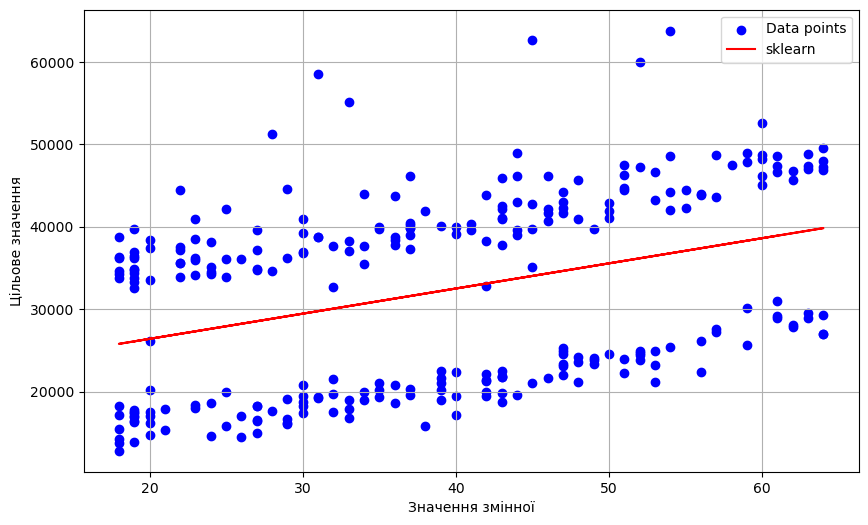

In [587]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_sklearn, color='red', label='sklearn')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

Модель дуже погано описує данi, про це свiдчить дуже малий R² score = 0.14, та RMSE що майже дорiвнює стандартному вiдхиленню. Використовувати не варто.